# DGA DETECTION MODEL

In [1]:
# IMPORT MODULES
import json
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tldextract
import re

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from __future__ import division
import collections

/Users/rqo422/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


ImportError: No module named tldextract

# Data Ingestion

In [2]:
#Read Clean Domains
#data_clean = pd.read_csv('Alexa_CleanDomains.csv',header=None)
#data_clean.columns = ['domains']
#data_clean['family'] = 'good'

In [3]:
list_clean_data = []
with open('top-1m.csv') as clean_data:
    for line in clean_data:
        domain_data = tldextract.extract(line)
        if domain_data.domain != '' and domain_data.suffix != '':
            list_clean_data.append([domain_data.domain, 'good', domain_data.suffix])
data_clean = pd.DataFrame(list_clean_data)
data_clean.columns = ['domains','family','tld']

index_ip = data_clean.domains.str.contains(r"^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$",
                                       flags=re.IGNORECASE, regex=True, na=False)
data_clean = data_clean[~index_ip]

In [4]:
# Strip out xn--

#data_clean['domains'] = data_clean['domains'].map(lambda x: str(x).lstrip('xn--'))

In [5]:
list_dga = []
dga_families_list = set()
#exception_families = ['banjori','bedep','bobax','conficker','corebot','cryptolocker','darkshell','dircrypt',\
#                      'ekforward','emotet','feodo','fobber','gozi1m','gozi3m','gozidays','hesperbot',\
#                      'javascript','locky','matsnu','murofet','necurs','nymaim','oderoor','padcrypt','pushdo',\
#                      'pushdotid','pykspa','pykspa2','pykspa2s','qadars','qakbot','ramdo','ramnit','ranbyus',\
#                      'redyms','rovnix','shifu','simda','suppobox','sutra','symmi','szribi','tempedreve','tinba',\
#                      'torpig','urlzone','virut','volatilecedar']
exception_families = ['modpack','ekforward','redyms','matsnu','gozi1m','gozidays','suppobox','gozi3m',\
                      'symmi','pushdo','simda']
def create_list(data):
    for key in data.keys():
        #if key.split('_')[0] not in exception_families:
            #print(key)
            family_dga_list = data[key]
            dga_families_list.add(key)
            for dga in family_dga_list:
                domain_data = tldextract.extract(dga)
                if domain_data.domain != '' and domain_data.suffix != '':
                    list_dga.append([domain_data.domain, key.split('_')[0], domain_data.suffix])

In [6]:
with open('/Users/rdy196/Downloads/Archive/2016-05-31_dgarchive.json') as json_data:
    data = json.load(json_data)
create_list(data)

with open('/Users/rdy196/Downloads/Archive/2016-05-31_dgarchive (1).json') as json_data:
    data = json.load(json_data)
create_list(data)

with open('/Users/rdy196/Downloads/Archive/2016-05-31_dgarchive (2).json') as json_data:
    data = json.load(json_data)
create_list(data)
    
with open('/Users/rdy196/Downloads/Archive/2016-05-31_dgarchive (3).json') as json_data:
    data = json.load(json_data)
create_list(data)
    
with open('/Users/rdy196/Downloads/Archive 2/2016-06-09_dgarchive.json') as json_data:
    data = json.load(json_data)
create_list(data)
    
with open('/Users/rdy196/Downloads/Archive 2/2016-06-09_dgarchive (1).json') as json_data:
    data = json.load(json_data)
create_list(data)
    
with open('/Users/rdy196/Downloads/Archive 2/2016-06-09_dgarchive (2).json') as json_data:
    data = json.load(json_data)
create_list(data)
    
with open('/Users/rdy196/Downloads/Archive 2/2016-06-09_dgarchive (3).json') as json_data:
    data = json.load(json_data)
create_list(data)

data_dga = pd.DataFrame(list_dga)
data_dga.columns = ['domains','family','tld']

index_ip = data_dga.domains.str.contains(r"^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$",
                                       flags=re.IGNORECASE, regex=True, na=False)
data_dga = data_dga[~index_ip]

In [7]:
bluecoat = pd.read_csv('/Users/rdy196/Downloads/bluecoat/domains_bluecoat.csv')
bluecoat.columns = ['url','count']
bluecoat.drop('count', axis=1, inplace=True)

def extract_domain(domain):
    domain_data = tldextract.extract(domain)
    return domain_data.domain

def extract_tld(domain):
    domain_data = tldextract.extract(domain)
    return domain_data.suffix

bluecoat['domains'] = bluecoat["url"].apply(lambda x: extract_domain(x))
bluecoat['family'] = 'unknown'
bluecoat['tld'] = bluecoat["url"].apply(lambda x: extract_tld(x))

bluecoat.drop('url', axis=1, inplace=True)

index_ip = bluecoat.domains.str.contains(r"^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$",
                                       flags=re.IGNORECASE, regex=True, na=False)
bluecoat = bluecoat[~index_ip]
bluecoat = bluecoat[bluecoat['domains'] != '']
bluecoat = bluecoat[bluecoat['tld'] != '']

In [8]:
data_dga = data_dga.drop_duplicates()

In [9]:
bluecoat = bluecoat.drop_duplicates()

In [10]:
len(dga_families_list)

418

In [11]:
print(data_dga[:10])

           domains family  tld
0      jvfvinkoowe  locky   it
1         exiktlgx  locky   de
2           ndwugh  locky   nl
3  pweyweehhcvsmmi  locky   ru
4     kgihmntlclco  locky   pm
5       tedaguryjm  locky   yt
6          hqnhpxi  locky   ru
7            qoiej  locky   uk
8    add1099freeos  tinba   ru
9     kccduhgswste  tinba  com


In [12]:
# READ DGA Domains
#data_dga = pd.read_csv('DGADomains.csv',header=None)
#data_dga['domains']=data_dga[0]

 # Data Prep

In [13]:
# Clean Data without Index
#train_clean = pd.DataFrame(data_clean['domains'])
#print(train_clean[:10])

#type(data_clean)

In [14]:
#Delete Duplicates

new=data_clean.drop_duplicates()
print(len(new))
new = new.dropna()
print(new[:10])

973831
     domains family    tld
0     google   good    com
1    youtube   good    com
2   facebook   good    com
3      baidu   good    com
4      yahoo   good    com
5     amazon   good    com
6  wikipedia   good    org
7         qq   good    com
8     google   good  co.in
9    twitter   good    com


In [15]:
clean_dom = new[[0]] # 0 are clean

clean_domains1 = clean_dom.values
clean_domains=clean_domains1.tolist()
clean_domains_flat = [val for sublist in clean_domains for val in sublist]
clean_dom['family'] = new[[1]]
clean_dom['tld'] = new[[2]]
clean_domains_flat[:10]

/Users/rdy196/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['google',
 'youtube',
 'facebook',
 'baidu',
 'yahoo',
 'amazon',
 'wikipedia',
 'qq',
 'google',
 'twitter']

In [16]:
#clean_domains1 = clean_dom.values
#clean_domains=clean_domains1.tolist()
#clean_domains_flat = [val for sublist in clean_domains for val in sublist]


In [17]:
count=0
for ll in clean_domains_flat:
    if(len(ll) == 0):
        count+=1
print(count)

0


In [18]:
print(data_dga.count())

domains    816730
family     816730
tld        816730
dtype: int64


In [19]:
# Clean Data without Index

#df_dga = pd.DataFrame(data_dga['domains'])

#train_dga=df_dga.drop_duplicates()
#train_dga = data_dga['domains']
dga_dom = data_dga[[0]]
dga_domains1 = dga_dom.values
print(len(dga_domains1))
dga_domains=dga_domains1.tolist()
dga_domains_flat = [val for sublist in dga_domains for val in sublist]
dga_dom['family'] = data_dga[[1]]
dga_dom['tld'] = data_dga[[2]]

816730


/Users/rdy196/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# FEATURE EXTRACTION

# FEATURE 1 : Domain Entropy 

In [20]:
# Shannon entropy H of a given input string.
# Given the discreet random variable X that is a string of N "symbols" consisting of n 
# different characters (n=2 for binary), 
# the Shannon entropy of X in bits/symbol is : where count is the count of character n.

import math
from collections import Counter

def entropy(s):
    p, lns = Counter(s), float(len(s))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

In [21]:
# Entropy of clean dataset
entropy_clean = []

for l in clean_domains_flat:
    entropy_clean.append(entropy(str(l)))

In [22]:
# Entropy of dga dataset
entropy_dga = []
for ll in dga_domains_flat:
    entropy_dga.append(entropy(ll))

In [23]:
bluecoat['label'] = "1"
bluecoat['entropy'] = bluecoat["domains"].apply(lambda x: entropy(x))

In [24]:
len(dga_domains_flat)

816730

In [25]:
print(np.mean(entropy_clean))
print(np.mean(entropy_dga))

2.7794604938
3.24944580448


In [26]:
clean_dom['label'] = "0"
dga_dom['label'] = "1"

# Add entropy calculations to dataframes
clean_dom['entropy'] = entropy_clean
dga_dom['entropy'] = entropy_dga


# FEATURE 2 : Domain Length

In [27]:
# lexical study
def dom_length(s):
    
    return len(s)

In [28]:
len_clean = []
for ll in clean_domains_flat:
    len_clean.append(dom_length(str(ll)))

In [29]:
len_dga = []
for ll in dga_domains_flat:
    len_dga.append(dom_length(ll))

In [30]:
# Length
clean_dom['length'] = len_clean
dga_dom['length'] = len_dga

In [31]:
bluecoat['length'] = bluecoat["domains"].apply(lambda x: dom_length(x))

In [32]:
print(np.mean(len_clean))
print(np.mean(len_dga))

10.081784211
15.1895350973


# FEATURE 3 : Vowel ratio

In [33]:
vowels = list("aeiou")
consonants = list("bcdfghjklmnpqrstvxzy")

In [34]:
# Feature Consonant/length
def conlen_ratio(s):
    number_of_vowels = sum(str(s).count(c) for c in vowels)
    ratio= (number_of_vowels)/(len(str(s))+1)
    return ratio

In [35]:
# Clean data
cl_ratio_clean = []
for ll in clean_domains_flat:
    cl_ratio_clean.append(conlen_ratio(str(ll)))

In [36]:
# Clean data
cl_ratio_dga = []
for ll in dga_domains_flat:
    cl_ratio_dga.append(conlen_ratio(ll))
    

In [37]:
clean_dom.head()

,domains,family,tld,label,entropy,length
0,google,good,com,0,1.918296,6
1,youtube,good,com,0,2.521641,7
2,facebook,good,com,0,2.750000,8
3,baidu,good,com,0,2.321928,5
4,yahoo,good,com,0,1.921928,5


In [38]:
print(np.mean(cl_ratio_clean))
print(np.mean(cl_ratio_dga))

0.3238958913
0.190060624415


In [39]:
# Add ratio calculations to dataframes
clean_dom['ratio'] = cl_ratio_clean
dga_dom['ratio'] = cl_ratio_dga

In [40]:
bluecoat['ratio'] = bluecoat["domains"].apply(lambda x: conlen_ratio(x))

# FEATURE 4 : Distinct Characters/length

In [41]:
0# Feature 4 : Distinct Character
def dom_distchar(s):
 dist_char = ''.join(set(s)) 
 return len(dist_char)/(len(s)+1)

In [42]:
# Clean
dist_clean = []
for ll in clean_domains_flat:
    dist_clean.append(dom_distchar(str(ll)))
    
dist_dirty = []
for ll in dga_domains_flat:
    dist_dirty.append(dom_distchar(str(ll)))    

In [43]:
print(np.mean(dist_clean))
print(np.mean(dist_dirty))

0.717222436208
0.712099152307


In [44]:
# Add ratio calculations to dataframes
clean_dom['diff_char'] = dist_clean
dga_dom['diff_char'] = dist_dirty
print(len(clean_dom))

973831


In [45]:
bluecoat['diff_char'] = bluecoat["domains"].apply(lambda x: dom_distchar(x))

In [46]:
print(len(dga_dom))

816730


In [47]:
feature_dataset =  pd.concat([clean_dom, dga_dom], ignore_index=True)

# FEATURE 5: PercentageCoverage


In [48]:
import nltk
#nltk.download()
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

In [49]:
def get_percentage_coverage(s):
    count = 0
    tcount = 0
    for i in range(0,(len(s)+1)):
        for j in range(i,(len(s)+1)):
            if s[i:j+1] in english_vocab:
                tcount += 1
            count += 1
    #return tcount / float(count)
    return tcount / float(len(s))

In [50]:
feature_dataset["pct_coverage"] = feature_dataset["domains"].apply(lambda x: get_percentage_coverage(x))

In [51]:
bluecoat['pct_coverage'] = bluecoat["domains"].apply(lambda x: get_percentage_coverage(x))

In [52]:
# FEATURE: NUMBER OF DIGITS PER UNIT LENGTH IN EACH DOMAIN
def num_digits(s):
   o = sum(c.isdigit() for c in s)
   return o

feature_dataset["digits"] = feature_dataset["domains"].apply(lambda x: num_digits(str(x))/(len(str(x))+1))

In [53]:
bluecoat["digits"] = bluecoat["domains"].apply(lambda x: num_digits(str(x))/(len(str(x))+1))

In [54]:
char_set = "abcdefghijklmnopqrstuvwxyz-"
for ch in char_set:
    feature_dataset[ch] = feature_dataset["domains"].apply(lambda x: float(str(x).count(ch))/(len(str(x))+1))

In [55]:
char_set = "abcdefghijklmnopqrstuvwxyz-"
for ch in char_set:
    bluecoat[ch] = bluecoat["domains"].apply(lambda x: float(str(x).count(ch))/(len(str(x))+1))

#FEATURE 6: N Grams

In [56]:
from nltk.util import ngrams

In [57]:
def compute_ngram_features(domain, n, metric):
    ngram = ngrams(list(domain), n)
    counter = collections.Counter(ngram)
    freq_list = [frequency for item, frequency in counter.most_common()]
    if metric == 'average':
        return np.average(freq_list)
    elif metric == 'stddev':
        return np.std(freq_list)
    else:
        return np.median(freq_list)

In [58]:
ngram_dict = {}
list_ngram = [2,3]
for num in list_ngram:
    for word in english_vocab:
        if len(word) > 3:
            char_list = ngrams(list(word), num)
            counts = collections.Counter(char_list)
            for item, frequency in counts.most_common():
                if ngram_dict.has_key(item):
                    ngram_dict[item] = ngram_dict[item] + frequency
                else:
                    ngram_dict[item] = frequency
ngrams_dataset = pd.DataFrame(ngram_dict.items())
#with open('ngrams.csv','a') as dd:
#    ngrams_dataset.to_csv(dd, index=False)

In [59]:
#ngram_list = [('bi',2), ('tri',3), ('quad',4), ('penta',5)]
#metric_list = ['average', 'stddev', 'median']
#for ngram, number in ngram_list:
#    for metric in metric_list:
#        feature_dataset[ngram + '-gram_' + metric] \
#        = feature_dataset["domains"].apply(lambda x: compute_ngram_features(x, number, metric))

In [60]:
#ngram_list = [('bi',2), ('tri',3), ('quad',4), ('penta',5)]
#metric_list = ['average', 'stddev', 'median']
#for ngram, number in ngram_list:
#    for metric in metric_list:
#        bluecoat[ngram + '-gram_' + metric] \
#        = bluecoat["domains"].apply(lambda x: compute_ngram_features(x, number, metric))

In [61]:
def compute_ngram_normality_features(domain, n):
    ngram = ngrams(list(domain), n)
    counter = collections.Counter(ngram)
    sum_ngram_freq = 0
    for item, frequency in counter.most_common():
        if ngram_dict.has_key(item):
            sum_ngram_freq = sum_ngram_freq + ngram_dict[item]
    if (len(domain) - n + 1) > 0 :
        return sum_ngram_freq/(len(domain) - n + 1)
    else:
        return 0

In [62]:
ngram_list = [('bi',2), ('tri',3)]
for ngram, number in ngram_list:
    feature_dataset[ngram + '-gram_normality'] \
        = feature_dataset['domains'].apply(lambda x: compute_ngram_normality_features(x, number))

In [63]:
ngram_list = [('bi',2), ('tri',3)]
for ngram, number in ngram_list:
    bluecoat[ngram + '-gram_normality'] \
        = bluecoat['domains'].apply(lambda x: compute_ngram_normality_features(x, number))

#Collocation

In [64]:
import nltk
import nltk.collocations
import nltk.corpus
import collections
from nltk.util import ngrams

In [65]:
bgm = nltk.collocations.BigramAssocMeasures()

In [66]:
def compute_collocation_for_bigrams(words):
    finder = nltk.collocations.BigramCollocationFinder.from_words(nltk.corpus.brown.words())
    def create_filter(words):
        def bigram_filter(w1, w2):
            return (w1 not in words and w2 not in words) 
        return bigram_filter
    my_filter = create_filter(words)
    finder.apply_freq_filter(3)
    finder.apply_ngram_filter(my_filter)
    ngram_sorted_score_list = finder.score_ngrams(bgm.pmi)
    feature_score = 0
    for item, score in ngram_sorted_score_list:
        if words[0] == item[0] and words[1] == item[1]:
            feature_score = feature_score + score
    return feature_score

In [67]:
def get_dict_words(domain):
    word_list = []
    for i in range(0,(len(domain)+1)):
        for j in range(i,(len(domain)+1)):
            word = domain[i:j+1]
            if word in english_vocab and len(word)>2:
                word_list.append(word)
    return word_list

In [68]:
def compute_average_collocation_score(domain):
    bigrams=ngrams(get_dict_words(domain),2)
    total_score = 0
    bigram_count = 0
    score = 0
    for bigram in bigrams:
        bigram_count = bigram_count + 1
        total_score = total_score + compute_collocation_for_bigrams(bigram)
    if bigram_count != 0:
        score = total_score/bigram_count
    return score

In [69]:
feature_dataset["bigram_colloc"] = feature_dataset["domains"].apply(lambda x: compute_average_collocation_score(x))

KeyboardInterrupt: 

In [ ]:
feature_dataset = feature_dataset.fillna(0)

In [ ]:
bluecoat = bluecoat.fillna(0)

In [70]:
count_rec = len(feature_dataset)
count_rec

1790561

In [71]:
nan_rows = feature_dataset[feature_dataset.isnull().T.any().T]
nan_rows

,domains,family,tld,label,entropy,length,ratio,diff_char,pct_coverage,digits,...,t,u,v,w,x,y,z,-,bi-gram_normality,tri-gram_normality


In [65]:
bluecoat_merged = pd.concat([feature_dataset, bluecoat])

In [66]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#feature_dataset.tld = le.fit_transform(feature_dataset.tld)
bluecoat_merged.tld = le.fit_transform(bluecoat_merged.tld)

In [72]:
feature_dataset_without_bluecoat = bluecoat_merged[:count_rec]
feature_dataset_bluecoat = bluecoat_merged[count_rec:]

In [73]:
pd.set_option('display.max_columns', None)

# DUMP DGA MODEL FEATURE DATA AS A .CSV FILE

In [75]:
# Output 
with open('feature_dataset.csv','a') as dd:
    feature_dataset.to_csv(dd, index=False)

# Random Forest Model

In [158]:
msk = np.random.rand(len(feature_dataset)) < 0.70

train = feature_dataset[msk]

test = feature_dataset[~msk]

from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#features = feature_dataset.columns[3:]
features = [
 'entropy',
 'length',
 'ratio',
 'diff_char',
 'pct_coverage',
 'digits',
 '-',
 'bi-gram_average',
 'bi-gram_stddev',
 'bi-gram_median',
 'tri-gram_average',
 'tri-gram_stddev',
 'tri-gram_median',
 'quad-gram_average',
 'quad-gram_stddev',
 'quad-gram_median',
 'penta-gram_average',
 'penta-gram_stddev',
 'penta-gram_median',
 'bi-gram_normality',
 'tri-gram_normality']

In [74]:
msk = np.random.rand(len(feature_dataset_without_bluecoat)) < 0.70

train = feature_dataset_without_bluecoat[msk]

test = feature_dataset_without_bluecoat[~msk]

from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#features = feature_dataset.columns[3:]
features = [
 'tld',
 'entropy',
 'length',
 'ratio',
 'diff_char',
 'pct_coverage',
 'digits',
 '-',
 'bi-gram_normality',
 'tri-gram_normality']

In [75]:
clf = RandomForestClassifier(n_jobs=100, min_samples_leaf = 2, max_features = 3,max_depth=35)
#clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,
#                             min_samples_split=2,
#                             min_samples_leaf=1,
#                             max_depth=5,
#                             init=None,
#                             random_state=None,
#                             max_features=None,
#                             verbose=2)
y, _ = pd.factorize(train['label'])

In [76]:
clf.fit(train[features], y)
test['prediction'] = clf.predict(test[features])
predicted_proba = clf.predict_proba(test[features])
print(features)

['tld', 'entropy', 'length', 'ratio', 'diff_char', 'pct_coverage', 'digits', '-', 'bi-gram_normality', 'tri-gram_normality']


/Users/rdy196/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [77]:
y_test, _ = pd.factorize(test['label'])
#print(metrics.confusion_matrix(y_test, predicted))
print(metrics.confusion_matrix(y_test, test['prediction']))

[[282837  10077]
 [ 11838 233007]]


In [78]:
feature_dataset_bluecoat['prediction'] = clf.predict(feature_dataset_bluecoat[features])
predicted_proba = clf.predict_proba(feature_dataset_bluecoat[features])
print(features)

['tld', 'entropy', 'length', 'ratio', 'diff_char', 'pct_coverage', 'digits', '-', 'bi-gram_normality', 'tri-gram_normality']


/Users/rdy196/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [79]:
bad_probability = [y for x, y in predicted_proba]

In [97]:
test['bad_prob'] = bad_probability

/Users/rdy196/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
feature_dataset_bluecoat['bad_prob'] = bad_probability

/Users/rdy196/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
print(metrics.classification_report(y_test, test['prediction']))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96    292914
          1       0.96      0.95      0.96    244845

avg / total       0.96      0.96      0.96    537759



In [82]:
print(metrics.accuracy_score(y_test, test['prediction']))

0.959247543974


In [83]:
test[['label']] = test[['label']].astype(int)
test_df_false = test[test['prediction'] != test['label']]
filtered_test_df_false = test_df_false[['domains','family']]
false_series = filtered_test_df_false.groupby(['family']).count()
false_df = false_series.add_suffix('_predicted_false').reset_index()

/Users/rdy196/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [84]:
#test_df_family = test[test['family'].isin(exception_families)]
filtered_test_df_family = test[['domains','family']]
overall_series = filtered_test_df_family.groupby(['family']).count()
overall_df = overall_series.add_suffix('_overall').reset_index()

In [85]:
def compute_percentage(df):
    return (df['domains_predicted_false'] * 100) / df['domains_overall']

In [86]:
comparison_df = pd.merge(overall_df, false_df, on='family', how='outer')
comparison_df = comparison_df.fillna(0)
comparison_df['percentage_false'] = comparison_df.apply(compute_percentage,axis=1)
comparison_df = comparison_df.sort(['percentage_false'], ascending=False).reset_index(drop=True)

In [87]:
comparison_df

,family,domains_overall,domains_predicted_false,percentage_false
0,bobax,1,1,100.000000
1,matsnu,139,137,98.561151
2,gozidays,176,172,97.727273
3,redyms,8,7,87.500000
4,gozi1m,75,64,85.333333
5,gozi3m,157,132,84.076433
6,suppobox,2127,1526,71.744241
7,ekforward,6,4,66.666667
8,pushdo,496,237,47.782258
9,darkshell,16,5,31.250000


In [88]:
test_true = feature_dataset_bluecoat[feature_dataset_bluecoat['prediction'] == 1]
test_true.sort(['bad_prob'], ascending=True).reset_index(drop=True)

,domains,family,tld,label,entropy,length,ratio,diff_char,pct_coverage,digits,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,-,bi-gram_normality,tri-gram_normality,prediction,bad_prob
0,cyprusflag,unknown,1107,1,3.321928,10,0.181818,0.909091,1.900000,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.090909,0.090909,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0,6521.444444,285.375000,1,0.500000
1,pagibighouseforsale,unknown,283,1,3.616349,19,0.450000,0.650000,2.105263,0.000000,0.100000,0.050000,0.000000,0.000000,0.100000,0.050000,0.100000,0.050000,0.100000,0.000000,0.000000,0.050000,0.000000,0.000000,0.100000,0.050000,0.000000,0.050000,0.100000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0,9441.722222,1103.941176,1,0.500000
2,gigizmeunew,unknown,555,1,2.913977,11,0.416667,0.666667,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,0.083333,0,7201.800000,192.888889,1,0.500000
3,hksusa,unknown,283,1,2.251629,6,0.285714,0.714286,1.833333,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0,5469.800000,129.250000,1,0.500207
4,sojern,unknown,283,1,2.584963,6,0.285714,0.857143,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,10350.000000,305.250000,1,0.500238
5,toywiz,unknown,283,1,2.584963,6,0.285714,0.857143,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.142857,0.142857,0,4570.200000,20.750000,1,0.500521
6,riversideappliance,unknown,1107,1,3.308271,18,0.421053,0.578947,2.166667,0.000000,0.105263,0.000000,0.052632,0.052632,0.157895,0.000000,0.000000,0.000000,0.157895,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,0.105263,0.000000,0.105263,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0,13448.823529,1628.562500,1,0.500531
7,wctrib,unknown,283,1,2.584963,6,0.142857,0.857143,1.666667,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0,9460.000000,1287.250000,1,0.500633
8,sightlmg,unknown,283,1,2.750000,8,0.111111,0.777778,1.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.111111,0.111111,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,3289.142857,405.833333,1,0.500890
9,hubapi,unknown,283,1,2.584963,6,0.428571,0.857143,2.166667,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0,4851.800000,203.000000,1,0.501017


# Feature Importance

In [89]:
clf.feature_importances_

# Feature List
# 'entropy', 'length', 'ratio', 'diff_char', 'pctCoverage', 'digits','a', 'b', 'c',
#       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q',
#       'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '-'

array([ 0.04115875,  0.09862914,  0.10954899,  0.0872706 ,  0.01241896,
        0.16589041,  0.02405317,  0.04101843,  0.18165763,  0.23835392])

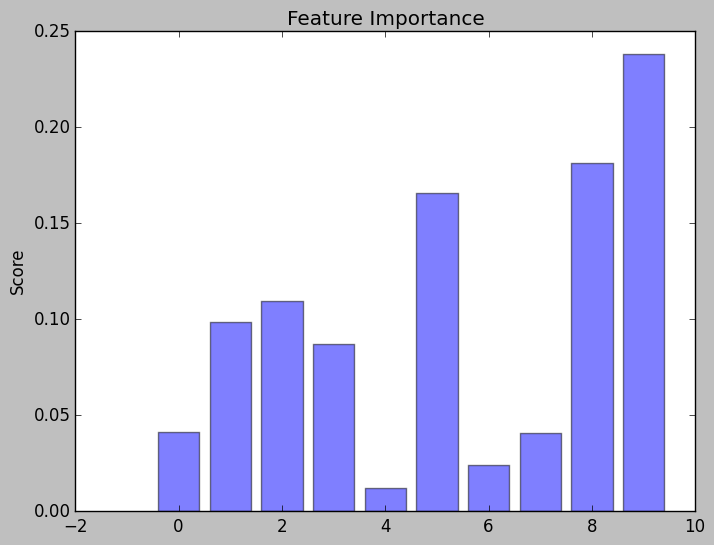

In [90]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = clf.feature_importances_
y_pos = np.arange(len(objects))
 
b1 = plt.bar(y_pos, objects, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)

plt.ylabel('Score')
plt.title('Feature Importance')

plt.show()

# Feature List from feature 0 (=Entropy) to feature 31 
# 'entropy', 'length', 'ratio', 'diff_char', 'pctCoverage', 'a', 'b', 'c',
#       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q',
#       'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'digits'